<br>

<b><font size=22> Big data and Marketing </font></b>

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>GNABA Ange - Michel</font>**

**<font color = salmon>MASTER 2 EBDS</font>**


In [121]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer # preserves the root of words so that two words with the same stem will be considered as one and the same word
from nltk.stem.snowball import SnowballStemmer
import emoji #to clean emojis
import demoji #to clean emojis
import pickle #to save serialized data
from sklearn.decomposition import PCA #PCA
from sklearn.cluster import KMeans, DBSCAN #clustering methods
demoji.download_codes() #downloading emojis
import re

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_1967/4072118773.py:14: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes() #downloading emojis


TweetsCOV19 is a semantically annotated corpus of Tweets about the COVID-19 pandemic

In [122]:
from bs4 import BeautifulSoup #to remove web characters

In [123]:
from tqdm.notebook import tqdm #progress bar

In [124]:
link_file = "https://raw.githubusercontent.com/lilyhuong/Bigdata-and-marketing/e270465ec5686145b9f0f5f6b67e535e649ac72a/data.csv?token=GHSAT0AAAAAAB23GAORQE4WNWOEKWS66FEMY3UD2QQ"
df = pd.read_csv(link_file, index_col= 0)

In [125]:
df

user_name        user_location  \
50143        GoodMorningWilton     Wilton, CT 06897   
52558             Mitchel Bell  Washington DC Metro   
3866                 PIB India            New Delhi   
67077             Daniel Mumby                Chard   
153918         Jimmy Kokinakes         Kankakee, IL   
...                        ...                  ...   
114102                Dan Male      London, England   
67848   The New Indian Express              Chennai   
142615               Diamond Q    Oklahoma City, OK   
61053          Richard herlihy                  NaN   
68630               Jenn_Vega1       Ventura County   

                                         user_description  \
50143   #WiltonCT's go-to news source. Daily, GOOD new...   
52558   Uber sales guy - Hunter - Focus is on sales pe...   
3866    Press Information Bureau. Nodal agency for com...   
67077   Christian, journalist, film buff, cricket fan ...   
153918  There are no small audiences, only small comic...   
...                                                   ...   
114102  Editor of @ICJnews, @TalentJournal and @WMJnew...   
67848   All the tweets for breaking news & views.\nFac...   
142615                               👀  follow or you gay   
61053                                                 NaN   
68630   This is ME!•DallasCowboys🏈•Latina🇲🇽🇺🇸•Starbuck...   

               user_created  user_followers  user_friends  user_favourites  \
50143   2013-04-03 19:13:57            1234           451              765   
52558   2010-02-20 19:28:20              83            92                7   
3866    2010-12-27 11:55:36         2063891           265             2149   
67077   2012-07-08 15:15:19             678           981             8961   
153918  2014-05-31 18:52:32            1112          2081             8843   
...                     ...             ...           ...              ...   
114102  2016-07-17 14:10:57             164           484             1276   
67848   2009-12-05 09:24:55          446499           552              540   
142615  2020-06-21 01:56:52              18            15               29   
61053   2013-05-04 20:35:52              86           392              177   
68630   2009-03-25 03:02:08             143           270              280   

        user_verified                 date  \
50143           False  2020-07-31 17:34:35   
52558           False  2020-08-01 19:00:19   
3866             True  2020-07-25 10:05:16   
67077           False  2020-08-04 07:52:32   
153918          False  2020-08-18 16:17:44   
...               ...                  ...   
114102          False  2020-08-12 07:31:15   
67848            True  2020-08-04 07:28:56   
142615          False  2020-08-17 06:59:50   
61053           False  2020-08-02 20:36:26   
68630           False  2020-08-04 07:05:22   

                                                     text  \
50143   Analyzing School Reopening Details, Wilton BOE...   
52558   NICE Satmetrix Benchmark finds 57% of contact ...   
3866    #CoronaWatch\n\n◾ 13,36,861 total confirmed ca...   
67077   "XR f***s up so often because we became way to...   
153918  @realDonaldTrump America's most DISGRUNTLED EM...   
...                                                   ...   
114102  Karamjit is absolutely right to talk about the...   
67848   UN chief says over one billion students are af...   
142615  Follow or you gay 👀 #DarceyAndStacey #PValley ...   
61053   @L5Roby @ChristianDMZ @andifasano @meliswein @...   
68630   This is horrible! #StayHomeSavesLives #WearADa...   

                                                 hashtags  \
50143                                                 NaN   
52558                                                 NaN   
3866                                      ['CoronaWatch']   
67077                                                 NaN   
153918                                        ['COVID19']   
...                                   

In [126]:
#df = df.sample(frac=0.03 , random_state = 123)

In [127]:
df = df[['user_name', "text", "hashtags", "is_retweet"]]

In [128]:
df.dtypes

user_name     object
text          object
hashtags      object
is_retweet      bool
dtype: object

## Exploratory Data Analysis

In [129]:
df.drop_duplicates(subset='text',inplace=True)

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_1967/1356646241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='text',inplace=True)


From this step, we haad remove 425 duplicate tweet that duplicate 

In [130]:
df.shape

(5373, 4)

In [131]:
df.describe()

user_name                                               text  \
count                 5373                                               5373   
unique                4782                                               5373   
top     GlobalPandemic.NET  Analyzing School Reopening Details, Wilton BOE...   
freq                    21                                                  1   

           hashtags is_retweet  
count          3806       5373  
unique         2169          1  
top     ['COVID19']      False  
freq           1132       5373

<AxesSubplot:xlabel='is_retweet', ylabel='count'>

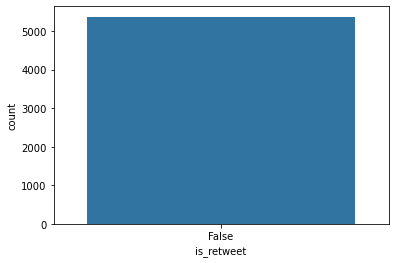

In [132]:
sns.countplot(x = 'is_retweet', data = df)

### Count number of current word in a tweet 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


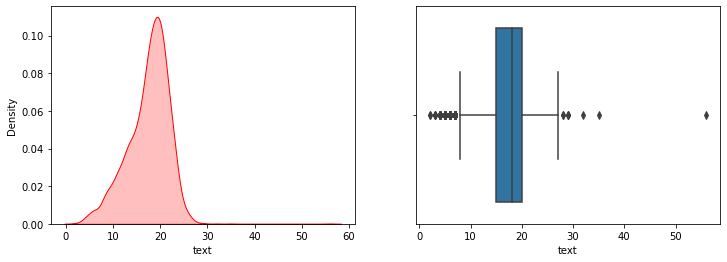

In [133]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['text'].str.count(' ') + 1,color='r',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df['text'].str.count(' ') + 1)
plt.show()

In [134]:
(df['text'].str.count(' ') + 1).mean()

17.415038153731622

In [135]:
# nltk.download('stopwords')
# nltk.download('punkt') # tokenizer divides a text into a list of sentences by using an unsupervised algorithm 
#                         #to build a model for abbreviation words, collocations, and words that start sentences
# nltk.download('words') # word from an english dictionnary 
# nltk.download('wordnet')   #another NLTK corpus reader

* transform tweet text into lowercase
* remove twitter handles (remove the user name)
* remove hyperlinks
* remove whitespace
* remove emoij

Start from removing the stopwords — auxiliary words that can be ignored

list of stopwords together with a couple of works such as retweet (‘rt’)

In [136]:
# additional  = ['rt','rts','retweet']
# swords = set().union(stopwords.words('english'),additional)
# lemmatizer = WordNetLemmatizer()  
# stemmer = SnowballStemmer("english")  # transform knowing to know, ed to none

In [137]:
# df['processed_text'] = df['text'].str.lower()\
#           .str.replace('(@[a-z0-9]+)\w+',' ')\
#           .str.replace('(http\S+)', ' ')\
#           .str.replace('(#\w+)', ' ')\
#           .str.replace("[“”·【】《》（）©£°¥«º»¿¤*~=%&€•@#…“”·、；！？【】《》（）©£¥«º»¿ðð¤_●–«» — — ´ ▽ ∀ ˊᗜ  ω  ▄ 〓█ ● ▂ █ ◥⊙ ▲ ⊙◤ ❶ ❷ ◍ ゜~ ← ▼ ω ♪ → ・｀ ღˇᴗˇ♡ ﾟ ]", " ")

In [138]:
def remove_weblinks(text):
    text = re.sub(r"((https?:\/\/)|(www\.))(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", " ", text)
    text = re.sub(r"/forum/\S+"," ", text)
    return text.strip()

def remove_mentions(text):
    text = re.sub("(\S+)?@\S+", ' ', text)
    text = re.sub(r"^.+@", " ", text)
    return text.strip()

def replace_empty(text):
    if text == '' or str(text) == 'nan':
        return "nan"
    if re.match("\s+$", text):
        return "nan"
    return text

def remove_hashtags(text):
    text = re.sub('(#\w+)', '', text)
    return text.strip()

# Applying Beautiful Soup (bs4) package to remove web characters (html) + remove emojis
def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)

def remove_emoji(text):
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
    cln_text = BeautifulSoup(text, 'lxml').get_text() # remove web characters
    cln_text = demoji.replace(cln_text, " ")
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       "]+", flags=re.UNICODE)

    cln_noemo = emoji_pattern.sub(r' ', cln_text)
    regex = get_emoji_regexp()
    cln_post = regex.sub(" ", cln_noemo)
    return (cln_post)

# Main function with preprocessing - please keep your eye on order of functions
def preprocess(text):
    text = str(text)
    text = remove_weblinks(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_emoji(text)
    text = replace_empty(text)
    text = re.sub("\s+"," ", text)
    text = re.sub("’", "'", text)
    text = re.sub("[“”·【】《》（）©£°¥«º»¿¤*~=%&€•@#…“”·、；！？【】《》（）©£¥«º»¿ðð¤_●–«» — — ´ ▽ ∀ ˊᗜ  ω  ▄ 〓█ ● ▂ █ ◥⊙ ▲ ⊙◤ ❶ ❷ ◍ ゜~ ← ▼ ω ♪ → ・｀ ღˇᴗˇ♡ ﾟ ]"," ",text)
    text = re.sub(r"(\bRT\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"(\brt\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"(\bretweet\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub("[-\/\(\)\\\[\]\|]", " ", text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"^\W+", "", text)
    text = re.sub(r"(^\W+)?(^from: \w+ on \w+)?",'',text,flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub("\s+", " ", text)
    text = re.sub("⠀"," ", text)
    text = re.sub(r"^\W+", "", text)
    text = re.sub(r"\s+"," ", text)
    return text.strip()

In [139]:
tqdm.pandas()

In [140]:
df['processed_text'] = df['text'].progress_apply(preprocess)

  0%|          | 0/5373 [00:00<?, ?it/s]

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_1967/183880227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['text'].progress_apply(preprocess)


In [142]:
df

user_name  \
50143        GoodMorningWilton   
52558             Mitchel Bell   
3866                 PIB India   
67077             Daniel Mumby   
153918         Jimmy Kokinakes   
...                        ...   
114102                Dan Male   
67848   The New Indian Express   
142615               Diamond Q   
61053          Richard herlihy   
68630               Jenn_Vega1   

                                                     text  \
50143   Analyzing School Reopening Details, Wilton BOE...   
52558   NICE Satmetrix Benchmark finds 57% of contact ...   
3866    #CoronaWatch\n\n◾ 13,36,861 total confirmed ca...   
67077   "XR f***s up so often because we became way to...   
153918  @realDonaldTrump America's most DISGRUNTLED EM...   
...                                                   ...   
114102  Karamjit is absolutely right to talk about the...   
67848   UN chief says over one billion students are af...   
142615  Follow or you gay 👀 #DarceyAndStacey #PValley ...   
61053   @L5Roby @ChristianDMZ @andifasano @meliswein @...   
68630   This is horrible! #StayHomeSavesLives #WearADa...   

                                                 hashtags  is_retweet  \
50143                                                 NaN       False   
52558                                                 NaN       False   
3866                                      ['CoronaWatch']       False   
67077                                                 NaN       False   
153918                                        ['COVID19']       False   
...                                                   ...         ...   
114102                                            ['NHS']       False   
67848                                         ['COVID19']       False   
142615  ['DarceyAndStacey', 'PValley', '90DayFianceHap...       False   
61053                                            ['Mets']       False   
68630   ['StayHomeSavesLives', 'WearADamnMask', 'Socia...       False   

                                           processed_text  
50143   Analyzing School Reopening Details, Wilton BOE...  
52558   NICE Satmetrix Benchmark finds 57 of contact c...  
3866    13,36,861 total confirmed cases 8,49,432 cases...  
67077   XR f s up so often because we became way too b...  
153918  America's most DISGRUNTLED EMPLOYEE is Donald ...  
...                                                   ...  
114102  Karamjit is absolutely right to talk about the...  
67848   UN chief says over one billion students are af...  
142615                                  Follow or you gay  
61053               BREAKING NEWS GM Brodie Van Wagenen a  
68630                                   This is horrible!  

[5373 rows x 5 columns]

In [18]:
# def preprocessSentence(sentence):
#     sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

#     sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

#     tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

#     words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

#     words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)
    
#     words_lemmatize = (re.sub(r"[^a-zA-Z0-9]","",w) for w in words_lemmatize)

#     sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

#     return sentence_clean.split()

In [19]:
#df["preprocess_tweet"] = df["text"].apply(preprocessSentence)

Statistical approaches such as machine learning and deep learning work well with numerical data. However, natural language consists of words and sentences. Therefore, before you can build a sentiment analysis model, you need to convert text to numbers. Several approaches have been developed for converting text to numbers. Bag of Words,

In [20]:
words_df = df["processed_text"]

In [21]:
dfa = pd.get_dummies(words_df.apply(pd.Series).stack()).sum(level=0) 
dfa.head()

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_1967/4274843108.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dfa = pd.get_dummies(words_df.apply(pd.Series).stack()).sum(level=0)
/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_1967/4274843108.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfa = pd.get_dummies(words_df.apply(pd.Series).stack()).sum(level=0)


00gmt  00pm  100k  100odd  100x  10am  10b  10death  10th  1173new  \
50143       0     0     0       0     0     0    0        0     0        0   
52558       0     0     0       0     0     0    0        0     0        0   
3866        0     0     0       0     0     0    0        0     0        0   
67077       0     0     0       0     0     0    0        0     0        0   
153918      0     0     0       0     0     0    0        0     0        0   

        ...  zone  zoo  zoom  zoonosi  zoonot  zt  zubiri  zupco  zweli  zyada  
50143   ...     0    0     0        0       0   0       0      0      0      0  
52558   ...     0    0     0        0       0   0       0      0      0      0  
3866    ...     0    0     0        0       0   0       0      0      0      0  
67077   ...     0    0     0        0       0   0       0      0      0      0  
153918  ...     0    0     0        0       0   0       0      0      0      0  

[5 rows x 9680 columns]

In [297]:
# Counting the occurence of each word
words_sum = dfa.sum(axis = 0).T
words_sum = words_sum.sort_values(ascending = False)

<AxesSubplot:>

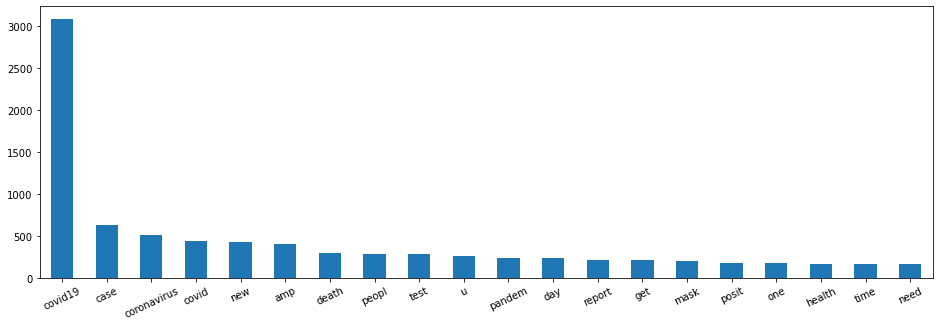

In [298]:
# Graph the more used word
words_sum_max = words_sum.head(20)

plt.figure(figsize=(16,5))
words_sum_max.plot.bar(rot=25)

hdbs scan, can identifiy outiliers compare to kmeans with soft clustering, with density, kmeans is basily select K 

approximate 
stopword only LDA, count number frequence of work 

## Part 2: BERT-like sentence embeddings